# BTTH08: Ẩn dữ liệu khả nghịch trên ảnh bằng phương pháp DE (phần 2)

TODO: Võ Phương Hòa - 1412192

---

## 1. Cách làm bài và nộp bài

**Làm bài**

Bạn sẽ làm trực tiếp trên file notebook này; trong file, mình đã để từ `TODO` để cho biết những chỗ mà bạn cần phải làm (trong đó, `TODO` đầu tiên là bạn phải ghi họ tên và MSSV vào phần đầu của file). Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

*Mục tiêu chính ở đây là học, học một cách chân thật; nếu bạn được 5 điểm nhưng bạn làm bài một cách chân thật thì vẫn tốt hơn nhiều so với 10 điểm mà không chân thật. Bạn có thể thảo luận với các bạn khác; nhưng bài làm phải là của chính bạn, dựa trên sự hiểu của chính bạn, lời văn là của chính bạn, code là của chính bạn. Bạn không nên đọc bài làm của các bạn năm trước. Nếu bị phát hiện gian lận thì bạn sẽ bị 0 điểm cho toàn bộ phần thực hành.*

**Nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All` để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, trong thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) bạn đặt: file `Ex08-ReversibleDataHiding-Img-DE2.ipynb`, và các file dữ liệu khác (vd, file ảnh nếu bạn chèn ảnh vào notebook); rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

## 2. Nội dung

Trong tuần này, bạn sẽ xem lại quá trình nhúng và rút trích DE dựa vào bài giảng trên lớp của mình; bạn có thể tham khảo thêm ở trong paper nếu thấy cần. Mục tiêu của tuần này là hiểu quá trình nhúng và rút trích DE, để chuẩn bị cho phần cài đặt.
	
Trong báo cáo, bạn cần trình bày:

- Các bước của quá trình nhúng DE.
- Các bước của quá trình rút trích DE.

Bạn nên dùng hình/sơ đồ để mô tả tổng thể các bước của quá trình nhúng/rút trích; rồi dựa vào hình/sơ đồ đó để diễn giải cụ thể từng bước (có thể chèn được hình vào notebook; khi nộp bạn nhớ nộp luôn cả file hình). Bạn nên trình bày theo *cách hiểu của mình, theo ngôn từ của mình*. Bạn cũng có thể ghi vào trong báo cáo những câu hỏi mà mình vẫn còn thắc mắc. Nên nhớ mục tiêu của việc viết báo cáo là để bạn tổng kết lại kiến thức cho *chính bạn*, để chuẩn bị cho phần cài đặt.

In [1]:
%matplotlib inline
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt

## 3. Quá trình nhúng

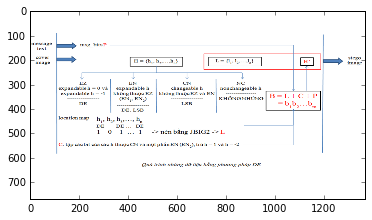

In [2]:
img = imread('embed.png')
plt.imshow(img, cmap = 'gray')
plt.show()

Quá trình nhúng gồm sáu bước dưới đây

### 3.1. Tìm h (the difference values)

- Từ ảnh số ban đầu, gộp từng 2 pixel của ảnh thành một nhóm. Phương pháp gộp có nhiều cách (cơ bản nhất là lấy hai pixel kề nhau (theo dòng hoặc cột), hoặc sử dụng một pattern, một quy tắc nào đó do người lập trình tự quy định).

- Từ mỗi nhóm 2 pixel, ta tìm $h$ và $l$ như sau: $h = x - y$, $l = \left \lfloor \frac{x + y}{2} \right \rfloor$ ($x, y$ là các giá trị pixel, $x, y \in Z$, $0 \le x, y \le 255)$

- Với các giá trị $h$ tìm được, ta xây dựng thành vector một chiều $\color{red}{H} =  \{ h_1, h_2,... , h_n \}$ và $\color{red}{L} = \{l_1, l_2,...,l_n\}$

### 3.2. Phân h vào 4 tập (EZ, EN, CN, NC)

- Xây dựng 4 tập sau:
    
    1) EZ: bao gồm mọi giá trị h expandable thỏa $h = 0$ hoặc $h = -1$.

    2) EN: bao gồm mọi giá trị h expandable thỏa $h \notin EZ$

    3) CN: bao gồm mọi giá trị h changeable thỏa $h \notin (EZ \cup EN)$.

    4) NC: bao gồm mọi giá trị h nonchangeable. (không nhúng với $h \in NC$)
    

- Phân mỗi giá trị $h$ vào một trong 4 tập trên.

### 3.3. Xây dựng bản đồ vị trí (location map)

- Nếu $h \in EZ \Rightarrow DE$
    
- Nếu $h \in EN$, dựa vào the payload size (độ dài chuỗi msg_bits), sẽ có một số $h$ được nhúng bằng phương pháp DE. Ở đây, ta phân h vào hai tập con $EN_1$ và $EN_2$.

- Ta xây dựng 1 bitmap (chiều dài của bitmap bằng số lượng the difference values h). Nếu $h \in (EZ \cup EN_1)$, ta đánh dấu '1' trên location map, nếu $h \in (EN_2 \cup CN \cup NC)$, ta đánh dấu '0' trên location map. Nếu h nào được đánh dấu '1' thì ta sử dụng phương pháp DE.

- Sau đó, ta nén location map bằng phương pháp nén JBIG2 (đây là phương pháp nén không làm mất mát dữ liệu). Chuỗi bit sau nén ta đặt là $\color{red}{L}$.    
                     

### 3.4. Tập hợp các giá trị LSBs ban đầu

- Chọn các giá trị LSBs ban đầu của các $h \in (EN_2 \cup CN)$. Với mỗi $h \in (EN_2 \cup CN), LSB(h)$ sẽ được đưa vào bitstream $\color{red}{C}$ (trừ h = 1 và h = -2).

### 3.5. Nhúng dữ liệu

- Nhúng location map $\color{red}{L}$, tập LSBs $\color{red}{C}$ và chuỗi msg_bits $\color{red}{P}$ vào một chuỗi bit $\color{red}{B}$: $\color{red}{B} = \color{red}{L} \cup \color{red}{C} \cup \color{red}{P}$ = $b_1b_2...b_m$ ($b_i \in \{0, 1\}, 1 \le i \le m$).

- Cách nhúng dữ liệu:

    1) Đặt i = 1 và j = 0
    
    2) While ($i \le m$):
    
    j = j + 1
        
    if $h_j \in (EZ \cup EN_1):  h_j = 2h_j + b_i$, $i = i + 1$ // DE
    
    elseif $h_j \in (EN_2 \cup CN): h_j = 2\left\lfloor\frac{h_j}{2} \right\rfloor + b_i$, $i = i + 1$ // LSB
       
    3) End.
    
    $\Rightarrow$ tập $\color{red}{H^{'}}$
    
### 3.6. Tìm các giá trị pixel mới (x', y')

- Từ tập $\color{red}{H'}$ tìm được và tập $L = \{l_1, l_2,...,l_n\}$  lúc đầu (bước 1), ta tìm $x', y'$ như sau: $x' = l + \left\lfloor\frac{h' + 1}{2}\right\rfloor, y' = l - \left\lfloor\frac{h'}{2}\right\rfloor$

## 4. Quá trình rút trích

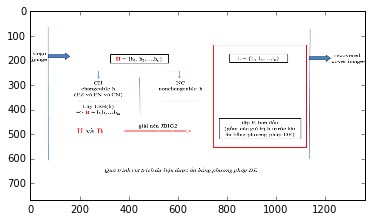

In [3]:
img = imread('extract.bmp')
plt.imshow(img, cmap = 'gray')
plt.show()

Quá trình rút trích gồm 5 bước sau đây

### 4.1. Tìm h (the difference values)

- Tương tự như quá trình nhúng, ta gộp mỗi 2 pixel thành một nhóm (tạm gọi là (x, y)), khi đó $h = x - y$.

- Với các giá trị $h$ tìm được, ta xây dựng thành vector một chiều $\color{red}{H} =  \{ h_1, h_2,... , h_n \}$ và $\color{red}{L} = \{l_1, l_2,...,l_n\}$


### 4.2. Phân h vào 2 tập (CH, NC)

1) CH: bao gồm tất cả h changeable (tương đương tập $(EZ \cup EN \cup CN)$)

2) NC: bao gồm tất cả h nonchangeable.


### 4.3. Lấy LSBs từ các h trong tập CH

- Với mỗi $h\in CH$, ta lấy $LSB(h)$ đưa vào chuỗi bits $\color{red}{B} = b_1b_2...b_m$

### 4.4. Giải mã location map từ B bằng phương pháp giải nén JBIG2

- Khôi phục giá trị ban đầu của h như sau:

    1) Đặt i = s + 1

    2) For j = 1 to n:

    if $h_j == 1: h_j = \left\lfloor\frac{h_j}{2}\right\rfloor$ (với $h_j$ là giá trị thuộc location map)
    
    elseif $0 \le h_j \le 1: h_j = 1$
    
    elseif $-2 \le h_j \le -1: h_j = -2$
    
    else $h_j = 2\left\lfloor\frac{h_j}{2}\right\rfloor + b_i, i = i + 1$
    
    3) End
    
    $\Rightarrow$ tập $\color{red}{H}$
    
### 4.5. Khôi phục các giá trị pixel ban đầu

- Từ tập $\color{red}{H}$ tìm được và tập $L = \{l_1, l_2,...,l_n\}$  lúc đầu (bước 1), ta tìm $x, y$ như sau: $x = l + \left\lfloor\frac{h + 1}{2}\right\rfloor, y = l - \left\lfloor\frac{h}{2}\right\rfloor$


---

Enjoy DE :-)